Введите url изображения: https://raw.githubusercontent.com/Xtail96/ImageProcessing/master/labs/lab2/test_files/1.jpg


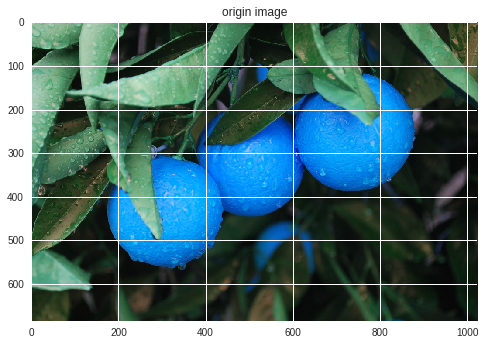

In [3]:
import cv2
import numpy
from matplotlib import pyplot as plt
import urllib.request

# select image
url = input("Введите url изображения: ")
req = urllib.request.urlopen(url)
arr = numpy.asarray(bytearray(req.read()), dtype=numpy.uint8)
origin_img = cv2.imdecode(arr, -1)

# show selected image
plt.imshow(origin_img)
plt.title("origin image")
plt.show()

Введите минимальное расстояние между центрами окружностей: 50
Введите минимальный радиус окружности: 80
Введите максимальный радиус окружности: 95


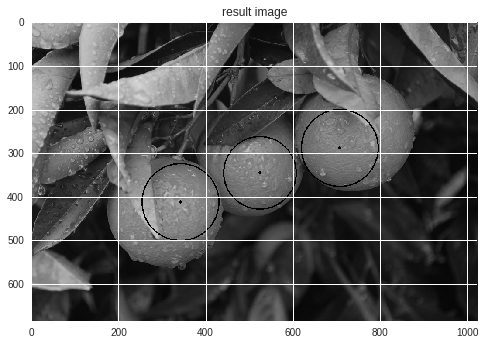

In [4]:
min_dist = int(input("Введите минимальное расстояние между центрами окружностей: "))
min_r = int(input("Введите минимальный радиус окружности: ")) 
max_r = int(input("Введите максимальный радиус окружности: "))

# лучшие параметры, которые удалось подобрать.
# min_dist = 50
# min_r = 80
# max_r = 95

gray_img = cv2.cvtColor(origin_img, cv2.COLOR_RGB2GRAY)

circles = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1, min_dist, param1=50, param2=30, minRadius = min_r, maxRadius = max_r)
#circles = numpy.uint16(numpy.around(circles))

if circles is not None:
    for i in circles[0,:]:
        cv2.circle(gray_img,(i[0],i[1]),i[2],(0,255,0),2)
        cv2.circle(gray_img,(i[0],i[1]),2,(0,0,255),3)
    
result_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)    
cv2.imwrite("results/result.bmp", result_img);

plt.imshow(result_img)
plt.title("result image")
plt.show()